In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = r"D:\KEC\sem5\CV_project\archive\New Masks Dataset"

In [4]:
train_path = os.path.join(base_dir, "Train")

In [5]:
val_path = os.path.join(base_dir, "Validation")

In [6]:
test_path = os.path.join(base_dir, "Test")

In [7]:
img_size = (150, 150)
batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [9]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.


In [10]:
val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 306 images belonging to 2 classes.


In [11]:
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: Mask or No Mask
])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
import sys
!{sys.executable} -m pip install Pillow


In [17]:
import sys
!{sys.executable} -m pip install scipy


In [18]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
19/19 [==============================] - 20s 1s/step - loss: 0.6240 - accuracy: 0.7200 - val_loss: 0.4262 - val_accuracy: 0.8203
Epoch 2/10
19/19 [==============================] - 12s 626ms/step - loss: 0.3476 - accuracy: 0.8700 - val_loss: 0.4088 - val_accuracy: 0.8137
Epoch 3/10
19/19 [==============================] - 11s 602ms/step - loss: 0.2560 - accuracy: 0.9083 - val_loss: 0.2840 - val_accuracy: 0.8889
Epoch 4/10
19/19 [==============================] - 11s 562ms/step - loss: 0.1708 - accuracy: 0.9500 - val_loss: 0.2949 - val_accuracy: 0.8627
Epoch 5/10
19/19 [==============================] - 11s 560ms/step - loss: 0.1849 - accuracy: 0.9367 - val_loss: 0.3583 - val_accuracy: 0.8595
Epoch 6/10
19/19 [==============================] - 11s 563ms/step - loss: 0.1457 - accuracy: 0.9467 - val_loss: 0.3142 - val_accuracy: 0.8922
Epoch 7/10
19/19 [==============================] - 12s 664ms/step - loss: 0.1593 - accuracy: 0.9317 - val_loss: 0.3211 - val_accuracy: 0.8693
Ep

In [21]:
import sys
!{sys.executable} -m pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 8.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.1 MB 7.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.1 MB 7.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 3.1 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 2.3 MB/s eta 0:00:03
   ----------------------- ---------------- 4.7/8.1 MB 2.8 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------- ---------

In [22]:
import matplotlib.pyplot as plt

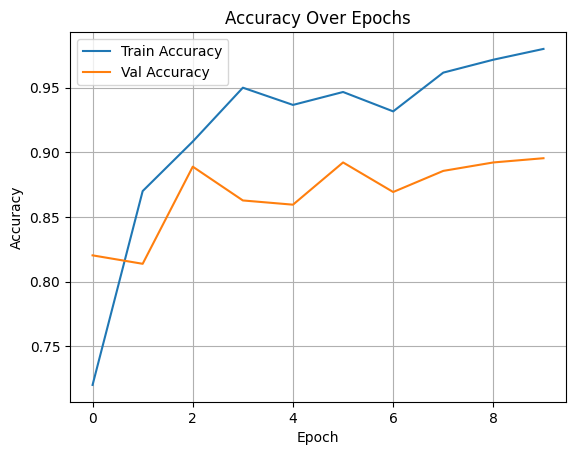

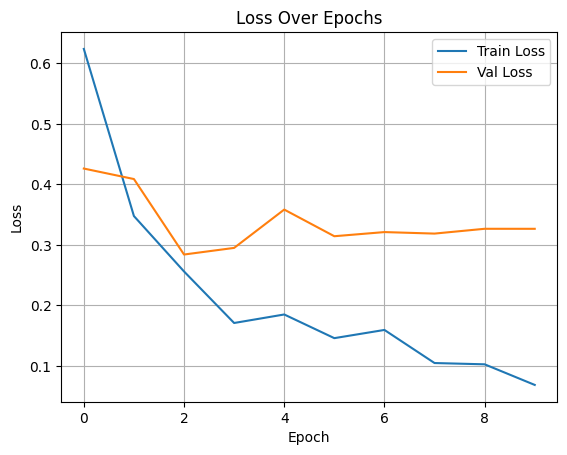

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

4/4 [==============================] - 2s 514ms/step - loss: 0.2730 - accuracy: 0.8900
Test Accuracy: 89.00%


In [25]:
model.save("face_mask_model.h5")

In [30]:
from tensorflow.keras.models import load_model

model = load_model("face_mask_model.h5")
